## Hypothesis Validation 

### Objectives:

The objective of hypothesis validation in this project is to apply statistical testing to uncover meaningful behavioural differences between normal and malicious network traffic. This helps identify patterns that could improve early threat detection and support cybersecurity decision-making.


1. **Detect Statistical Differences**  
   Quantify whether key features (such as `src_bytes` or `duration`) show significant differences between normal and malicious traffic classes.

2. **Identify Risk-Associated Attributes**  
   Determine whether certain categorical features (such as `service` type) are disproportionately linked to malicious activity.

3. **Validate Hypotheses with Statistical Rigor**  
   Use appropriate hypothesis tests (e.g. Mann-Whitney U, Chi-square, T-test) to ensure findings are statistically valid and not due to random chance.

4. **Support Explainable Insights**  
   Back statistical results with clear visualisations (e.g. boxplots, stacked bar charts) to help non-technical stakeholders understand threat patterns.

5. **Inform Detection Logic**  
   Use validated hypotheses to inform future detection rules, classification models, or security monitoring strategies.


<br>

 *Disclaimer: Some of the code snippets in this project were created or refined with the assistance of ChatGPT to support learning and exploration.*

 


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


# Load Cleaned Train Data

df = pd.read_csv('../data/cleaned/cleaned_train.csv')  
df. head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,log_src_bytes
0,0,tcp,ftp_data,SF,491,0,False,0,False,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,6.198479
1,0,udp,other,SF,146,0,False,0,False,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4.990433
2,0,tcp,private,S0,0,0,False,0,False,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0.000000
3,0,tcp,http,SF,232,8153,False,0,False,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,5.451038
4,0,tcp,http,SF,199,420,False,0,False,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,5.298317


In [2]:
 #check column name
 df.columns.tolist()

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class',
 'log_src_bytes']

In [3]:
# shows descriptive statistics
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,log_src_bytes
count,25184.000000,2.518400e+04,2.518400e+04,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,...,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000
mean,305.151009,2.433834e+04,3.492956e+03,0.023745,0.198102,0.001191,0.227922,0.001350,0.249921,0.014732,...,115.094346,0.519925,0.082513,0.147469,0.031854,0.285886,0.279896,0.117790,0.118807,3.234155
std,2686.976829,2.411188e+06,8.884481e+04,0.260262,2.154541,0.045425,10.419006,0.048793,11.502668,0.529686,...,110.649559,0.448949,0.187130,0.308410,0.110591,0.445361,0.446099,0.305877,0.317377,2.985165
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.806662
75%,0.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,5.634790
max,42862.000000,3.817091e+08,5.151385e+06,3.000000,77.000000,4.000000,884.000000,2.000000,975.000000,40.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.760169


### Interpreting Summary Statistics from df.describe()

| Statistic | What It Tells You | How to Interpret It in This Dataset |
|-----------|-------------------|-------------------------------------|
| `count`   | Total number of non-null values for each column. | Confirms no missing data (all values = 25,184), so no imputation needed. |
| `mean`    | The average value of the column. | Helps understand the general magnitude, but can be misleading if data is skewed (e.g. `src_bytes` mean is much higher than the median). |
| `std`     | Standard deviation — how spread out the values are. | High `std` means values vary widely; useful for identifying columns with potential outliers (`src_bytes`, `duration`). |
| `min`     | The smallest observed value in the column. | Indicates the lower boundary. If it’s 0 for most features, the data might be sparse or binary-like. |
| `25%`     | First quartile — 25% of the data falls below this value. | Good for spotting skew and sparsity. If 25% = 0, the feature has many zero entries (common in intrusion datasets). |
| `50%`     | Median — middle value of the distribution. | More reliable than the mean when data is skewed. If 50% = 0 and mean is much higher, it confirms long-tailed or zero-inflated features. |
| `75%`     | Third quartile — 75% of the data falls below this value. | Helps identify where most values lie and contrast with max. If 75% is very low but max is very high, the feature has strong outliers. |
| `max`     | The highest observed value in the column. | Useful for spotting extreme cases or anomalies — especially in features like `num_root`, `src_bytes`, or `duration`. |


<br>

### Interpretation of Descriptive Statistics and Spread

| Feature                   | Interpretation |
|---------------------------|----------------|
| `duration`                | Most connections are very short (median = 0), but some last a long time (max = 42,862 sec). High variance and extreme skew indicate that outliers dominate this feature. |
| `src_bytes`               | 50% of traffic sends fewer than 44 bytes, yet some connections send over 382 million. Standard deviation and max are very high, suggesting strong right skew and heavy-tailed behaviour. |
| `dst_bytes`               | Similar to `src_bytes`: most connections receive little or no data in return. 75% are below 531 bytes, but outliers exceed 5 million. |
| `wrong_fragment`          | Almost always 0 (median and 75% = 0), with a rare max of 3. Low variance but may indicate rare fragmentation attacks. |
| `hot`                     | Majority are 0 (sparse feature), but some spike up to 77. High deviation shows rare but concentrated activity. |
| `num_failed_logins`       | Nearly always 0 with few values >0. Low variance; useful in spotting brute-force attempts. |
| `num_compromised`         | 75% of values are 0, but a few entries reach 884. High variance implies rare but critical compromise indicators. |
| `su_attempted`            | Rare escalation attempts (max = 2). Mostly zeros with low spread. |
| `num_root`                | 75% = 0, but max = 975. Extreme outliers reflect elevated privilege gains during attacks. |
| `num_file_creations`      | Rare feature creation events; 75% = 0, but max = 40. Might signal malware behaviour. |
| `dst_host_count` / `srv_count` | Median = 255. Some destination hosts are contacted extremely frequently — can signal scanning or DDoS. |
| `dst_host_same_srv_rate`  | Median = 0.51, 75% = 1.0. Suggests some hosts serve the same service repeatedly — common in automated scanning or web server attacks. |
| `dst_host_diff_srv_rate`  | Some hosts receive highly varied traffic (max = 1.0), indicating exploratory or multi-vector behaviour. |
| `dst_host_serror_rate` / `srv_serror_rate` | Many zero values, but also cases with all requests failing (rate = 1.0). Strong indicator of failed scans or blocked intrusions. |

<br>


### Key Features to Focus On (Based on Descriptive Statistics)

| Feature | Why It’s Important |
|---------|--------------------|
| `src_bytes` | Indicates how much data the source sends. Extremely high or zero values can signal exfiltration or scanning. |
| `dst_bytes` | Measures how much data is returned from the destination. Often zero in failed attacks or scans; large spikes can indicate suspicious responses. |
| `duration` | Connection time. Most are very short, but rare long connections could signal persistence or data transfer. |
| `num_failed_logins` | Tracks failed authentication attempts. Useful for identifying brute-force or password guessing attacks. |
| `num_compromised` | Reflects whether the session led to system compromise. Even a few non-zero values are highly significant. |
| `su_attempted` | Attempts to gain superuser privileges. Rare but critical indicator of intrusion intent. |
| `num_root` | Measures whether root-level access was achieved. High values indicate successful privilege escalation. |
| `hot` | Counts number of "hot" indicators (e.g. suspicious operations). Rare but concentrated in some attacks. |
| `num_file_creations` | Tracks new file creations during session — often associated with malware installation or persistence mechanisms. |
| `dst_host_same_srv_rate` | High values (close to 1.0) mean the same service is being accessed repeatedly — can indicate scanning or bot behavior. |
| `dst_host_diff_srv_rate` | Measures variation in services accessed — high values could indicate service enumeration or reconnaissance. |
| `dst_host_serror_rate` | High error rates suggest repeated failed connection attempts — common in port scanning or dropped sessions. |
| `dst_host_rerror_rate` | High response error rates are strong indicators of probes or misconfigured/malicious attempts. |


<br>

### Hypothesis 1 Validation:

**H1: Malicious traffic has significantly higher src_bytes than normal traffic**



🔍 H1: Malicious traffic has higher src_bytes


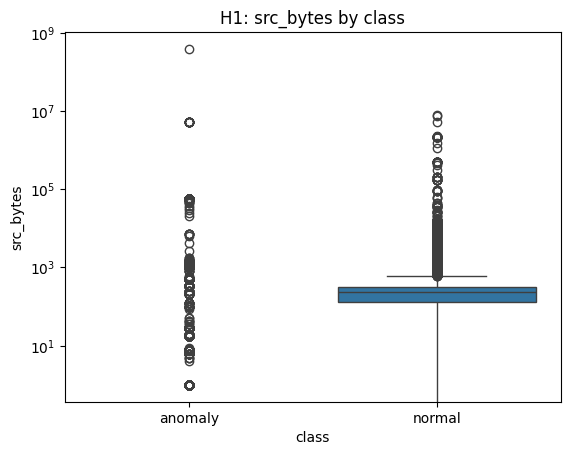

U-Statistic = 16002447.50, p-value = 1.00000
Conclusion:  Fail to reject H₀ 



In [4]:
# import libraries for statistical tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_train = pd.read_csv("../Data/Cleaned/cleaned_train.csv")
df_train['class'] = df_train['class'].astype('category')

# === H1: src_bytes - Mann-Whitney U Test ===
print("🔍 H1: Malicious traffic has higher src_bytes")
src_malicious = df_train[df_train['class'] == 'anomaly']['src_bytes']
src_normal = df_train[df_train['class'] == 'normal']['src_bytes']

sns.boxplot(data=df_train, x='class', y='src_bytes')
plt.title("H1: src_bytes by class")
plt.yscale('log')
plt.show()

stat, p = mannwhitneyu(src_malicious, src_normal, alternative='greater')
print(f"U-Statistic = {stat:.2f}, p-value = {p:.5f}")
print("Conclusion:", "Reject H₀" if p < 0.05 else " Fail to reject H₀", "\n")



#### Boxplot Interpretation
- The plot shows `src_bytes` distribution by connection class (`anomaly` vs `normal`) on a logarithmic scale.
- Normal traffic has a tightly clustered distribution with a few very large outliers reaching above \(10^7\) bytes.
- Malicious traffic (`anomaly`) shows a wider spread of low values and fewer extreme outliers.
- The median `src_bytes` for malicious traffic appears lower than that of normal traffic.


#### Statistical Test
- **Test Used**: Mann-Whitney U (non-parametric)  
- **U-Statistic** = 16,002,447.50  
- **p-value** = 1.00000  
- **Hypothesis Direction**: One-tailed — malicious traffic has higher `src_bytes`


#### Interpretation
- The very high p-value (1.0) indicates no statistical evidence to support the idea that `src_bytes` is higher in malicious traffic.
- The data does not support the hypothesis — in fact, it visually suggests the opposite trend.
- We fail to reject the null hypothesis (H₀).


#### Insight
- `src_bytes` does not appear to be a distinguishing feature for identifying malicious traffic in this dataset.
- This insight helps refine feature selection for downstream modeling or rule-based threat detection.


#### Conclusion

Hypotheses:
* **Null hypothesis (H₀)**: There is no significant difference in src_bytes between malicious and normal traffic.
* **Alternative hypothesis (H₁)**: Malicious traffic has significantly higher src_bytes than normal traffic.

- We **fail to reject the null hypothesis**.
- This means there is **no statistically significant evidence** that malicious traffic has higher `src_bytes`
- Therefore, `src_bytes` is **not a reliable indicator** of malicious behaviour in this context.


<br>

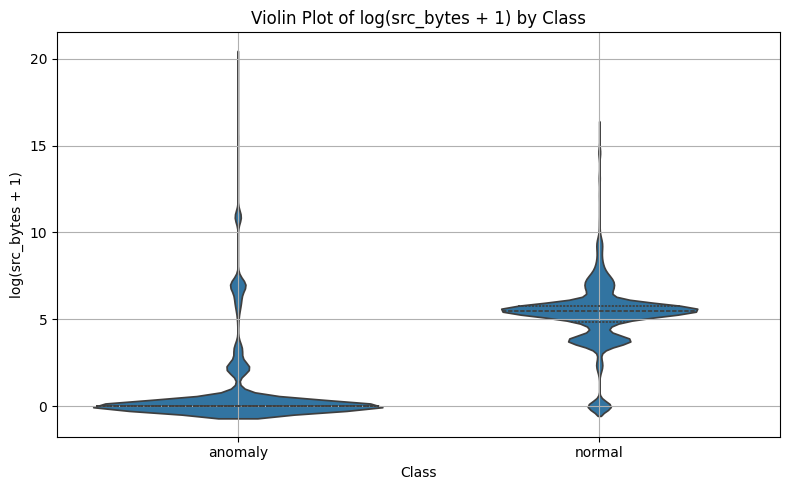

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
anomaly,11742.0,39149.524527,3.526664e+06,0.0,0.0,0.0,0.0,381709090.0
normal,13442.0,11400.316322,1.676504e+05,0.0,130.0,234.0,325.0,7665876.0


In [6]:
# Use Violin plot to further analyse  log(src_bytes + 1) by class

# Create log(src_bytes + 1) column if it doesn't exist
if 'log_src_bytes_plus1' not in df_train.columns:
    df_train['log_src_bytes_plus1'] = np.log(df_train['src_bytes'] + 1)

plt.figure(figsize=(8, 5))
sns.violinplot(data=df_train, x='class', y='log_src_bytes_plus1', inner='quartile')
plt.title('Violin Plot of log(src_bytes + 1) by Class')
plt.xlabel('Class')
plt.ylabel('log(src_bytes + 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = df_train.groupby('class')['src_bytes'].describe()
summary_stats



### 🔍 Violin Plot Key Observations

#### 1.  Anomaly (Malicious Traffic)
- Distribution is heavily compressed at the bottom around `log(1) = 0` → most values are `src_bytes = 0`
- The violin is **very narrow above 0**, showing **very few non-zero values**
- The **median, 25th, and 75th percentiles** are all at **0** — quartile lines are stacked at the bottom
- A few **outliers exist**, but they are rare → malicious traffic **usually sends no data**

#### 2.  Normal Traffic
- The violin is **wider across the range**, indicating a **greater spread** of `src_bytes` values
- The **median is clearly above 0**, showing that most normal traffic sends a **measurable amount of data**
- Distribution is **more bell-shaped**, with smooth tapering above and below the median

---

#### Interpretation Summary

| Class    | Pattern in Violin Plot                            | What It Means                                 |
|----------|---------------------------------------------------|-----------------------------------------------|
| Anomaly  | Narrow spike at bottom, flat distribution above   | Most malicious connections send 0 bytes       |
| Normal   | Bell-shaped, wider spread, median well above 0    | Normal connections typically send more data   |

---

#### Insight

- Malicious traffic shows **almost no activity** in terms of `src_bytes`, with only **occasional extreme spikes**
- This suggests `src_bytes` is **not a strong indicator** of malicious behaviour in this dataset  the signal is **too sparse**
-  Supports the result of the **Mann-Whitney U test**, which found **no significant difference**
